# Project Title: Email Spam Detection using Naive Bayes Classifier

## Introduction:

Email spam is a persistent problem in the digital era, where a significant portion of emails received daily consists of irrelevant or unsolicited messages. While spam emails might not always contain malware or phishing links, they disrupt user experiences and burden email systems with unnecessary traffic. To combat this issue, machine learning has become a preferred approach due to its ability to classify spam and legitimate emails with high accuracy. This project focuses on developing an email spam detection model using a Naive Bayes classifier, trained on labeled email datasets. By leveraging effective data preprocessing and feature extraction techniques like bag-of-words, the model aims to efficiently identify and filter spam emails. The project's goal is to enhance email filtering systems, ensuring they are reliable and efficient in handling everyday spam detection challenges.


## Problem Statement

The sheer volume of spam emails continues to grow, creating inefficiencies in email systems and frustrating users. Traditional spam filters often struggle to adapt to evolving spam patterns, leading to false positives (legitimate emails marked as spam) or false negatives (spam emails bypassing the filter). These inaccuracies can degrade the user experience and undermine trust in email systems. This project addresses these limitations by designing a machine learning model that emphasizes high recall, minimizing missed spam emails while maintaining overall classification accuracy. By utilizing a labeled email dataset and implementing a Naive Bayes classifier, the project aims to improve the precision and reliability of spam detection systems in practical use cases.


### Required Libraries

In [8]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

# Metrics for measuring performace of model
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report

# Train-test-split library
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

# import warnings
# warnings.filterwarnings('ignore')

### Load Dataset

In [10]:
mail = pd.read_csv('Mail Data.csv')

# Display first 5 rows of dataset
mail.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Understand Dataset

In [12]:
# Total rows & columns of dataset (rows, columns)
shape = mail.shape
print(f'Row: {shape[0]} \nColumn: {shape[1]}')

# Information about dataset
print('\nBasic Information:')
mail.info()
# Check for duplicates in dataset
dup = mail.duplicated().sum()
print(f'\nDuplicate rows: {dup}')

# Check for missing values in dataset
null = mail.isnull().sum()
print(f'\nTotal null: \n{null}')

# Total Unique Values in dataset
print('\n')
for col in mail.columns.tolist():
    print('Total Unique in ',col,': ',mail[col].nunique())

# Check class distribution of dataset
class_distribute = mail['Category'].value_counts(normalize=True)
print(f'\nClass Distribution: \n{class_distribute}')



Row: 5572 
Column: 2

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB

Duplicate rows: 415

Total null: 
Category    0
Message     0
dtype: int64


Total Unique in  Category :  2
Total Unique in  Message :  5157

Class Distribution: 
Category
ham     0.865937
spam    0.134063
Name: proportion, dtype: float64


### Understanding:

- Datset consists of 5572 rows with 2 columns
- In total, 415 duplicated rows
- No null values across all columns
- 2 unique values in 'Category' column, and 5157 unique values in the 'Message' column
- 87% of dataset falls under 'ham' dataset, 13% of dataset of falls under 

### Data Visualization

Text(0.5, 1.0, 'Distribution of Category (Pie Chart)')

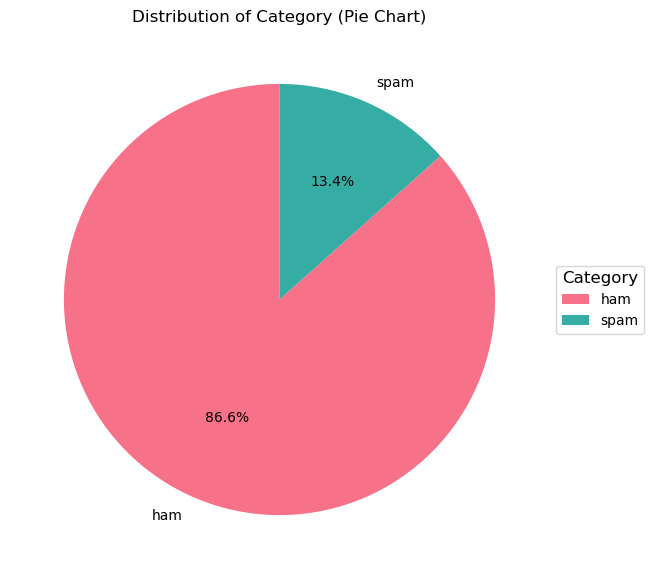

In [16]:
# Create a figure with two subplots
fig = plt.figure(figsize=(15, 7))

# Calculate value counts
cat_counts = mail['Category'].value_counts()

# Pie Chart
colors = sns.color_palette('husl', n_colors=len(cat_counts))
patches, texts, autotexts = plt.pie(cat_counts.values,
                                  labels=cat_counts.index,
                                  colors=colors,
                                  autopct='%1.1f%%',
                                  startangle=90,
                                  shadow=False)
# Add Legend
plt.legend(patches,
           cat_counts.index, 
           title='Category',
           loc='center left',
           bbox_to_anchor=(1, 0, 0.5, 1),
           fontsize=10,
           title_fontsize=12 )

plt.title(f'Distribution of Category (Pie Chart)')


### Understanding

- 86.6% of dataset falls under the category of 'ham' mail, only 13.4% of dataset falls under the category of 'spam' mail

In [19]:
# Most Used Word Visualization usin Word Cloud
spam = mail[mail['Category']=='spam'].copy()

# String to Store all words
words = ''

# Remove Stopwords
stopwords = set(STOPWORDS)

# Iterate through columns
for val in spam['Message']:
    # Typecast to String
    val = str(val)
    # Convert to lowercase & split
    tokens = val.lower().split()
    # Add to String
    words += " ".join(tokens) + " "

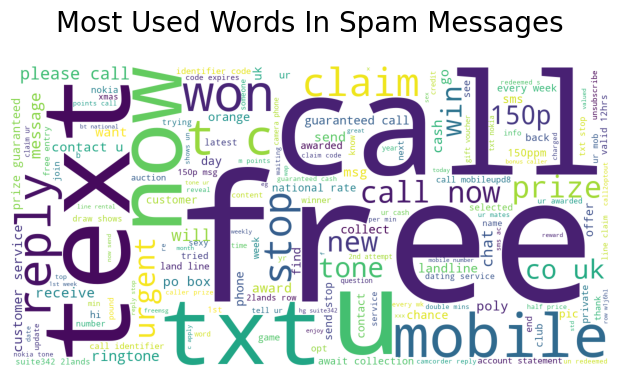

In [20]:
# Create Word Cloud
wordcloud = WordCloud(width = 1200, height = 600,
background_color ='white',
stopwords = stopwords,
min_font_size = 12,
max_words = 1000,
colormap = 'viridis',
prefer_horizontal=0.7,
random_state=42).generate(words)

# Set Labels
plt.figure(figsize = (6,6), facecolor = None)
plt.title('Most Used Words In Spam Messages', fontsize = 20, pad=25)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

### Understanding

- 'free', 'call', 'text', 'u', 'txt', 'mobile', 'now' are the most common words in spam mail

### Preprocessing Data

In [24]:
# Change categorical column to numeric
mail['Category'] = mail['Category'].map({'ham': 0, 'spam': 1})

# Train-test-split
X_train, X_test, Y_train, Y_test = train_test_split(mail['Message'], mail['Category'], test_size=0.25, random_state=42)

### Model Implementation

In [26]:
# Create pipeline combining CountVectorizer and MultinomialNB
clf = Pipeline ([('vectorizer',CountVectorizer()), # Convert text to numerical features
                 ('nb', MultinomialNB())]) # Multinomial Naive Bayes Classifier

# Fit model with training data
clf.fit(X_train,Y_train)

# Predictions
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
pred_prob_train = clf.predict_proba(X_train)[:,1]
pred_prob_test = clf.predict_proba(X_test)[:,1]
# 2 columns for array: [:,0]-> first column is prob of ham, [:,1] -> second column is prob of spam

# ROC AUC scores
roc_auc_train = roc_auc_score(Y_train, y_pred_train)
roc_auc_test = roc_auc_score(Y_test, y_pred_test)
print('\nTrain ROC AUC: ', roc_auc_train)
print('Test ROC AUC: ', roc_auc_test)


Train ROC AUC:  0.9833283079551736
Test ROC AUC:  0.9660849346553706


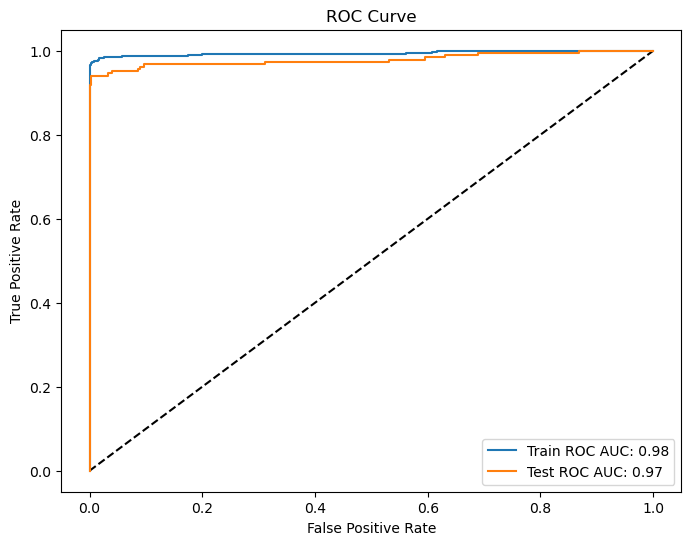

In [27]:
# Plot ROC curves
plt.figure(figsize=(8, 6))
fpr_train, tpr_train, thresholds_train = roc_curve(Y_train, pred_prob_train)
fpr_test, tpr_test, thresholds_test = roc_curve(Y_test, pred_prob_test)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr_train, tpr_train, label=f"Train ROC AUC: {roc_auc_train:.2f}")
plt.plot(fpr_test, tpr_test, label=f"Test ROC AUC: {roc_auc_test:.2f}")
plt.legend()
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

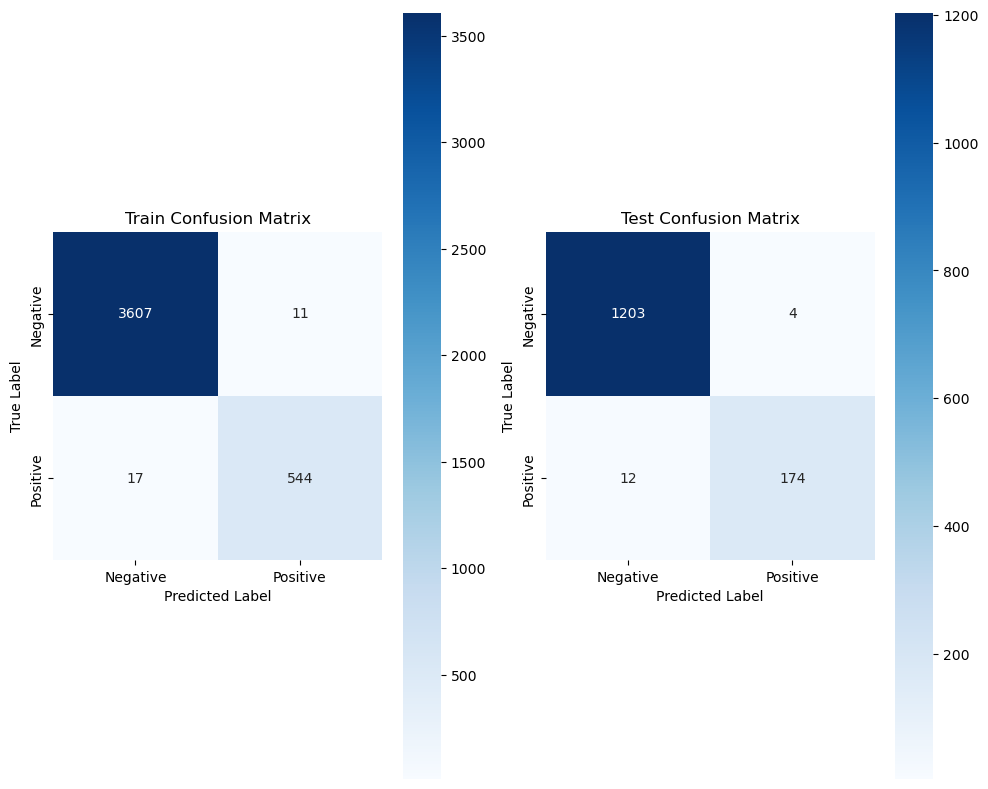

In [28]:
# Confusion Matrix
cm_train = confusion_matrix(Y_train, y_pred_train)
cm_test = confusion_matrix(Y_test, y_pred_test)

# Figure 
fig, ax = plt.subplots(1,2,figsize=(10,8))

# Heatmap visualization of confusion matrix
# print('\nConfusion Matrix:')
sns.heatmap(cm_train, 
            annot=True, 
            fmt='d',
            cmap='Blues',
            square=True, 
            cbar=True, 
            xticklabels=['Negative','Positive'], 
            yticklabels=['Negative','Positive'],
            ax=ax[0])
sns.heatmap(cm_test, 
            annot=True, 
            fmt='d',
            cmap='Blues',
            square=True, 
            cbar=True, 
            xticklabels=['Negative','Positive'], 
            yticklabels=['Negative','Positive'],
            ax=ax[1])
# Labels
ax[0].set_xlabel("Predicted Label")
ax[0].set_ylabel("True Label")
ax[0].set_title("Train Confusion Matrix")
ax[1].set_xlabel("Predicted Label")
ax[1].set_ylabel("True Label")
ax[1].set_title("Test Confusion Matrix")
plt.tight_layout()
plt.show()

In [29]:
# Classification Report
cr_train = classification_report(Y_train,y_pred_train,output_dict=True)
cr_test = classification_report(Y_test,y_pred_test,output_dict=True)

# Convert classification report dict to dataframe
cr_train_df = pd.DataFrame(cr_train).round(6)
cr_test_df = pd.DataFrame(cr_test).round(6)
# Transpose the dataframe
cr_train_df = cr_train_df.T
cr_test_df = cr_test_df.T
# Order of columns
cr_train_df = cr_train_df[['precision', 'recall', 'f1-score', 'support']]
cr_train_df['support'] = cr_train_df['support'].astype(int)
cr_test_df = cr_test_df[['precision', 'recall', 'f1-score', 'support']]
cr_test_df['support'] = cr_test_df['support'].astype(int)

print(f'Train Classification Report: \n{cr_train_df.to_markdown()}')
print(f'\nTest Classification Report: \n{cr_test_df.to_markdown()}')

# Accuracy Score
acc_train = accuracy_score(y_true = Y_train, y_pred =
y_pred_train)
acc_test = accuracy_score(y_true = Y_test, y_pred = y_pred_test)
print(f'\nTrain Accuracy: {acc_train}')
print(f'Test Accuracy: {acc_test}')

Train Classification Report: 
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    0.995309 | 0.99696  |   0.996134 |      3618 |
| 1            |    0.98018  | 0.969697 |   0.97491  |       561 |
| accuracy     |    0.9933   | 0.9933   |   0.9933   |         0 |
| macro avg    |    0.987745 | 0.983328 |   0.985522 |      4179 |
| weighted avg |    0.993278 | 0.9933   |   0.993285 |      4179 |

Test Classification Report: 
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    0.990123 | 0.996686 |   0.993394 |      1207 |
| 1            |    0.977528 | 0.935484 |   0.956044 |       186 |
| accuracy     |    0.988514 | 0.988514 |   0.988514 |         0 |
| macro avg    |    0.983826 | 0.966085 |   0.974719 |      1393 |
| weighted avg |    0.988442 | 0.988514 |   0.988407 |      1393 |

T

### Understanding:

The model demonstrates a 93.5% recall on the test set, reflecting its ability to detect the majority of spam emails effectively. 
This prioritization significantly reduces the chances of harmful content slipping through, supporting user trust and ensuring a 
better email filtering experience. Additionally, with an overall accuracy of 98.85%, the model balances reliability with precision, 
achieving a robust performance for the intended application.                                                                                                                                                                                                                                                                                                                                                                      

### Conclusion:

The spam detection model developed in this project demonstrates a high level of accuracy and recall, ensuring robust classification of emails while minimizing false negatives. By prioritizing recall as the primary metric, the model addresses the critical business need of protecting users from spam-related threats. The integration of modern preprocessing techniques and a Naive Bayes classifier enables efficient handling of diverse datasets, providing a scalable and adaptable solution. This project not only highlights the effectiveness of machine learning in tackling real-world problems but also underscores the importance of continuous innovation to stay ahead of evolving cyber threats. The results validate the chosen approach, offering a practical framework for enhancing email security systems​
